# Ngoc Ha
# HW 6 - ST 557

## Problem 1

In [1]:
sampCov = rbind(c(1106.00, 396.70, 108.40, 0.79, 26.23), c(396.70, 2382.00, 1143.00, -0.21, -23.96), c(108.40, 1143.00, 2136.00, 2.19, -20.84), c(0.79, -0.21, 2.19, 0.02, 0.22), c(26.23, -23.96, -20.84, 0.22, 70.56))
sampCov

1106.00,396.70,108.40,0.79,26.23
396.70,2382.00,1143.00,-0.21,-23.96
108.40,1143.00,2136.00,2.19,-20.84
0.79,-0.21,2.19,0.02,0.22
26.23,-23.96,-20.84,0.22,70.56


In [2]:
S_11 <- sampCov[1:3,1:3]
S_12 <- sampCov[1:3,4:5]
S_21 <- sampCov[4:5,1:3]
S_22 <- sampCov[4:5,4:5]

In [3]:
inv_sqrt <- function(A){
    ei <- eigen(A)
    V <- ei$vectors
    return (V %*% diag(1 / sqrt(ei$values)) %*% t(V))
}

In [4]:
S_11_inv <- solve(S_11)
S_22_inv <- solve(S_22)
S_11_inv_sqrt <- inv_sqrt(S_11)
S_22_inv_sqrt <- inv_sqrt(S_22)

In [5]:
A_1 <- S_11_inv_sqrt %*% S_12 %*% S_22_inv %*% S_21 %*% S_11_inv_sqrt
A_2 <- S_22_inv_sqrt %*% S_21 %*% S_11_inv %*% S_12 %*% S_22_inv_sqrt
ei1 <- eigen(A_1)
ei2 <- eigen(A_2)

In [6]:
a_1 <- round(ei1$vec[,1]%*%S_11_inv_sqrt,5)
b_1 <- round(ei2$vec[,1]%*%S_22_inv_sqrt,5)
a_2 <- round(ei1$vec[,2]%*%S_11_inv_sqrt,5)
b_2 <- round(ei2$vec[,2]%*%S_22_inv_sqrt,5)

In [7]:
cat("- 1st canonical variate loadings\na1_T:", a_1,"\nb1_T:",b_1)
cat("\n- 2nd canonical variate loadings\na2_T:", a_2,"\nb2_T:",b_2)

- 1st canonical variate loadings
a1_T: 0.01319 -0.01443 0.02337 
b1_T: -7.18548 0.01611
- 2nd canonical variate loadings
a2_T: 0.02471 -0.00929 -0.00873 
b2_T: 0.38023 -0.12007

### $\rho_j = \frac{Cov(a_j^TX^{(1)},b_j^TX^{(2)})}{\sqrt{Var(a_j^TX^{(1)})Var(b_j^TX^{(2)})}} = \frac{a_j^TCov(X^{(1)},X^{(2)})b_j}{\sqrt{a_j^TVar(X^{(1)})a_jb_j^TVar(X^{(2)})b_j}} = \frac{a_j^TS_{12}b_j}{\sqrt{a_j^TS_{11}a_jb_j^TS_{22}b_j}}$

In [8]:
cor1 <- (a_1%*%S_12%*%t(b_1))/sqrt(a_1%*%S_11%*%t(a_1)%*%b_1%*%S_22%*%t(b_1))
cor2 <- (a_2%*%S_12%*%t(b_2))/sqrt(a_2%*%S_11%*%t(a_2)%*%b_2%*%S_22%*%t(b_2))
cat("Correlations of canonical variates:", "\n1st pair:", cor1, "\n2nd pair:", cor2)

Correlations of canonical variates: 
1st pair: -0.4611246 
2nd pair: -0.1254845

## Problem 2

In [9]:
crude <- read.csv('CrudeOilData.csv')
head(crude)

Population,Vanadium,Iron,Beryllium,SatHydroCarb,AroHydroCarb
1,5.0,47,0.07,7.06,6.10
1,3.4,32,0.20,5.82,4.69
1,1.2,12,0.00,5.54,3.15
1,8.4,17,0.07,6.31,4.55
1,4.2,36,0.50,9.25,4.95
1,4.2,35,0.50,5.69,2.22


### (2a)

In [10]:
crude1 <- crude[crude$Population==1,2:ncol(crude)]
n1 <- nrow(crude1)
crude2 <- crude[crude$Population==2,2:ncol(crude)]
n2 <- nrow(crude2)

In [11]:
mu1 <- sapply(crude1,mean)
S1 <- cov(crude1)
mu2 <- sapply(crude2,mean)
S2 <- cov(crude2)
Sp <- ((n1-1)*S1+(n2-1)*S2)/(n1+n2-2)

In [12]:
unitVec <- function(x) {x / sqrt(sum(x^2))}
aT <- unitVec(t(mu1-mu2)%*%solve(Sp))
FisherCrit <- (aT%*%mu1+aT%*%mu2)/2
cat("Fisher Discriminant Function:", FisherCrit)

Fisher Discriminant Function: 1.18587

### (2b)

In [13]:
FisherClassifier <- function(aT,x,crit){
    predictions <- rep(0,nrow(x))
    for (i in 1:nrow(x)){
        FisherValue <- aT%*%t(x[i,])
        if (FisherValue >= crit){
            predictions[i] <- 1
        }
        else predictions[i] <- 2
    }
    return (predictions)
}

In [14]:
predictions1 <- FisherClassifier(aT,crude1,FisherCrit)
predictions2 <- FisherClassifier(aT,crude2,FisherCrit)

In [15]:
confusionMatrix <- data.frame(row.names=c("Sub-Mulina (true)","Upper (true)"),c(0,0),c(0,0))
colnames(confusionMatrix) <- c("Sub-Mulina (predicted)","Upper (predicted)")
confusionMatrix[1,1] <- length(predictions1[predictions1==1])
confusionMatrix[1,2] <- length(predictions1[predictions1==2])
confusionMatrix[2,1] <- length(predictions1[predictions2==1])
confusionMatrix[2,2] <- length(predictions1[predictions2==2])
confusionMatrix

,Sub-Mulina (predicted),Upper (predicted)
Sub-Mulina (true),11,0
Upper (true),2,36


### (2c)

In [16]:
x = data.frame(t(c(4.0,17.0,0.50,5.54,3.51)))

In [17]:
prediction <- FisherClassifier(aT,x,FisherCrit)
cat("Data point:",unlist(x[1,], use.names=FALSE))
if (prediction==1){
    cat("\nPrediction: Sub_Mulina")
} else cat("\nPrediction: Upper")

Data point: 4 17 0.5 5.54 3.51
Prediction: Upper

## Problem 3

In [18]:
track <- read.csv("TrackData.csv")
head(track)

Country,Abbrev,X100m.s,X200m.s,X400m.s,X800m.m,X1500m.m,X5000m.m,X10000m.m,Marathon.m
Argentina,ARG,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72
Australia,AUL,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
Austria,AUS,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
Belgium,BEL,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
Bermuda,BER,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62
Brazil,BRA,10.22,20.43,45.21,1.73,3.66,13.62,28.62,133.13


### (3a)

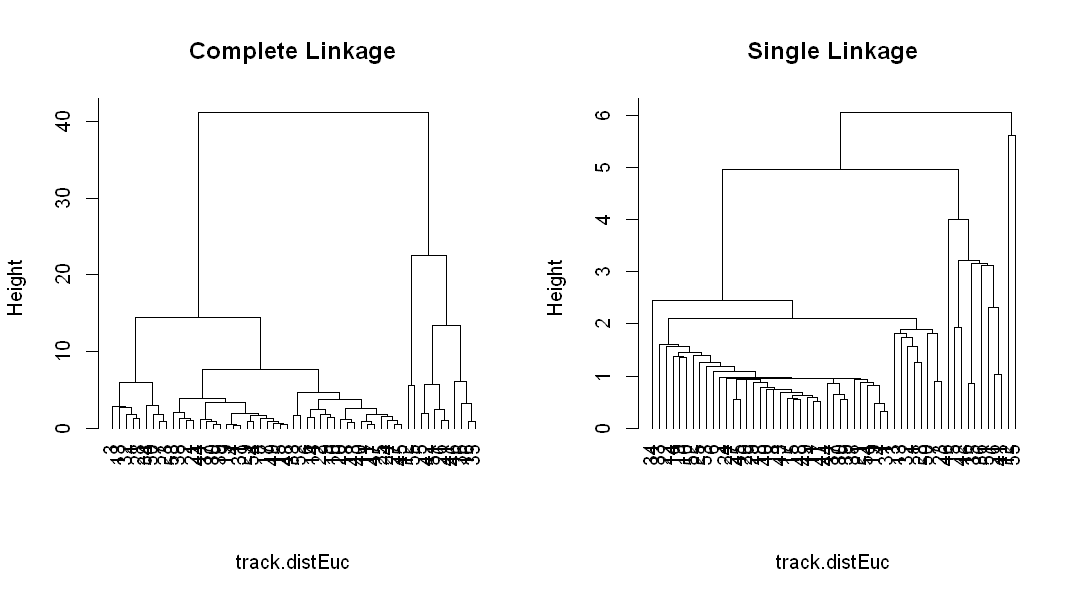

In [38]:
track.distEuc <- suppressWarnings(dist(track[,-1]))

track.hcEuc <- hclust(track.distEuc, method="complete")
track.hsEuc <- hclust(track.distEuc, method="single")

options(repr.plot.width = 9, repr.plot.height = 5)
par(mfrow=c(1,2))
plot(track.hcEuc, hang=-1, sub="", main="Complete Linkage")
plot(track.hsEuc, hang=-1, sub="", main="Single Linkage")

Complete Linkage might be more desirable, because Single Linkage seems to cluster in a chain-like fashion. However, we can't be sure because there is no ground truth.

### (3b)

In [20]:
track.km2 <- kmeans(track[,3:10], centers=2, nstart=10)

# Produce pairs plot with points colored by k-means cluster assignment
cat("k = 2")
cat("\n\nCluster 1:\n", as.character(track[track.km2$clus==1,1]), "\nCluster size:", length(as.character(track[track.km2$clus==1,1])))
cat("\n\nCluster 2:\n", as.character(track[track.km2$clus==2,1]), "\nCluster size:", length(as.character(track[track.km2$clus==2,1])))

k = 2

Cluster 1:
 Bermuda CookIslands DominicanRepublic Indonesia Malaysia Mauritius PapuaNewGuinea Philippines Singapore Thailand WestSamoa 
Cluster size: 11

Cluster 2:
 Argentina Australia Austria Belgium Brazil Burma Canada Chile China Columbia CostaRica Czechoslovakia Denmark Finland Grance EastGermany WestGermany GreatBritain Greece Guatemala Hungary India Ireland Israel Italy Japan Kenya SouthKorea NorthKorea Luxembourg Mexico Netherlands NewZealand Norway Poland Portugal Romania Spain Sweden Switzerland Taiwan Turkey USA Russia 
Cluster size: 44

In [21]:
track.km3 <- kmeans(track[,3:10], centers=3, nstart=10)

# Produce pairs plot with points colored by k-means cluster assignment
cat("k = 3")
cat("\n\nCluster 1:\n", as.character(track[track.km3$clus==1,1]), "\nCluster size:", length(as.character(track[track.km3$clus==1,1])))
cat("\n\nCluster 2:\n", as.character(track[track.km3$clus==2,1]), "\nCluster size:", length(as.character(track[track.km3$clus==2,1])))
cat("\n\nCluster 3:\n", as.character(track[track.km3$clus==3,1]), "\nCluster size:", length(as.character(track[track.km3$clus==3,1])))

k = 3

Cluster 1:
 Argentina Austria Bermuda Burma CostaRica Guatemala Israel SouthKorea Luxembourg Philippines Taiwan 
Cluster size: 11

Cluster 2:
 Australia Belgium Brazil Canada Chile China Columbia Czechoslovakia Denmark Finland Grance EastGermany WestGermany GreatBritain Greece Hungary India Ireland Italy Japan Kenya NorthKorea Mexico Netherlands NewZealand Norway Poland Portugal Romania Spain Sweden Switzerland Turkey USA Russia 
Cluster size: 35

Cluster 3:
 CookIslands DominicanRepublic Indonesia Malaysia Mauritius PapuaNewGuinea Singapore Thailand WestSamoa 
Cluster size: 9

In [22]:
track.km4 <- kmeans(track[,3:10], centers=4, nstart=10)

# Produce pairs plot with points colored by k-means cluster assignment
cat("k = 4")
cat("\n\nCluster 1:\n", as.character(track[track.km4$clus==1,1]), "\nCluster size:", length(as.character(track[track.km4$clus==1,1])))
cat("\n\nCluster 2:\n", as.character(track[track.km4$clus==2,1]), "\nCluster size:", length(as.character(track[track.km4$clus==2,1])))
cat("\n\nCluster 3:\n", as.character(track[track.km4$clus==3,1]), "\nCluster size:", length(as.character(track[track.km4$clus==3,1])))
cat("\n\nCluster 4:\n", as.character(track[track.km4$clus==4,1]), "\nCluster size:", length(as.character(track[track.km4$clus==4,1])))

k = 4

Cluster 1:
 Bermuda DominicanRepublic Indonesia Malaysia Mauritius PapuaNewGuinea Philippines Thailand 
Cluster size: 8

Cluster 2:
 Argentina Austria Burma CostaRica Greece Guatemala Israel SouthKorea Luxembourg Taiwan 
Cluster size: 10

Cluster 3:
 Australia Belgium Brazil Canada Chile China Columbia Czechoslovakia Denmark Finland Grance EastGermany WestGermany GreatBritain Hungary India Ireland Italy Japan Kenya NorthKorea Mexico Netherlands NewZealand Norway Poland Portugal Romania Spain Sweden Switzerland Turkey USA Russia 
Cluster size: 34

Cluster 4:
 CookIslands Singapore WestSamoa 
Cluster size: 3

### (3c)

#### Pair plots of KMeans clusters (k=3)

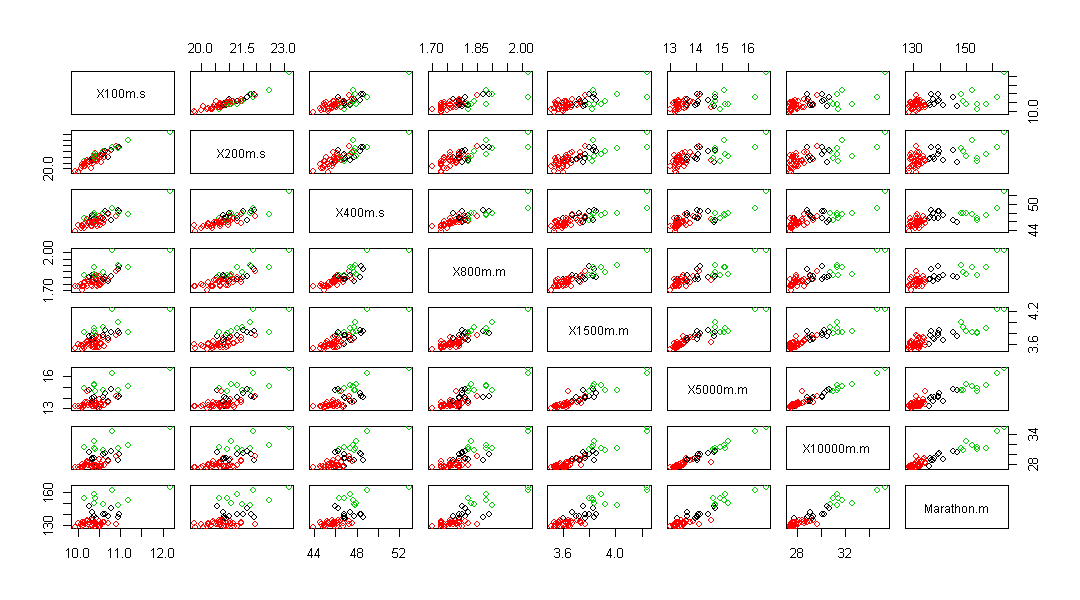

In [46]:
pairs(track[3:10], col = track.km3$clus)

#### Pair plots of Hierarchical clusters (k=3)

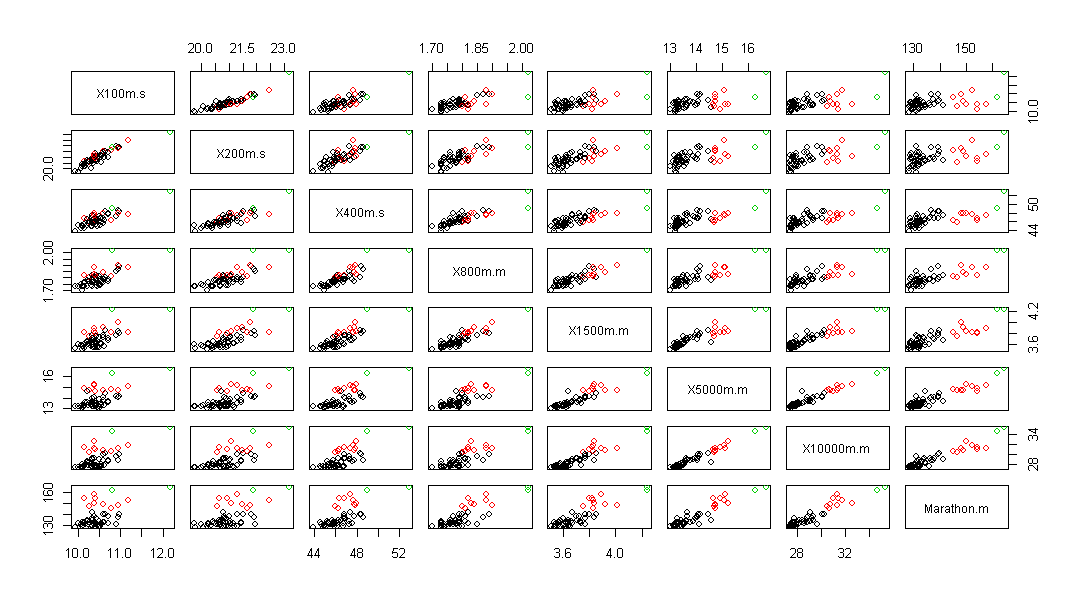

In [47]:
pairs(track[3:10], col = cutree(track.hcEuc, k = 3))

By looking at the pair plots (heuristically), Hierarchical Clustering will have smaller within sum of squares, which means Hierarchical CLustering fits the data better than Kmeans in this problem.

## Problem 4

In [24]:
archae <- read.csv("ArchaeoData.csv")
archae

,Site1,Site2,Site3,Site4,Site5,Site6,Site7,Site8,Site9
Site1,0.000,2.202,1.004,1.108,1.122,0.914,0.914,2.056,1.608
Site2,2.202,0.000,2.025,1.943,1.870,2.070,2.186,2.055,1.722
Site3,1.004,2.025,0.000,0.233,0.719,0.719,0.452,1.986,1.358
Site4,1.108,1.943,0.233,0.000,0.541,0.679,0.681,1.990,1.168
Site5,1.122,1.870,0.719,0.541,0.000,0.539,1.102,1.963,0.681
Site6,0.914,2.070,0.719,0.679,0.539,0.000,0.916,2.056,1.005
Site7,0.914,2.186,0.452,0.681,1.102,0.916,0.000,2.027,1.719
Site8,2.056,2.055,1.986,1.990,1.963,2.056,2.027,0.000,1.991
Site9,1.608,1.722,1.358,1.168,0.681,1.005,1.719,1.991,0.000


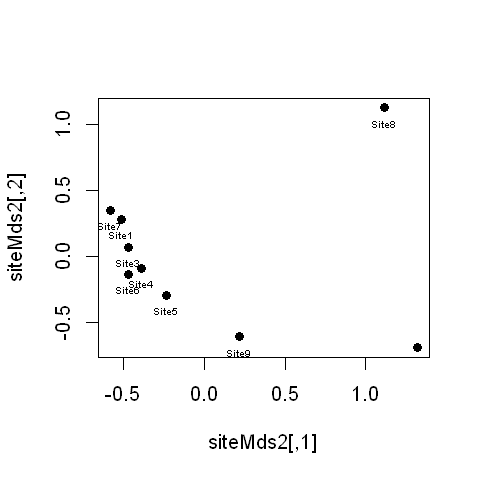

In [49]:
siteMds2 <- -cmdscale(archae, k=2)
options(repr.plot.width = 4, repr.plot.height = 4)
plot(siteMds2, pch=16)
text(siteMds2, row.names(archae), pos=1, cex=0.5)

In [39]:
siteMds3 <- cmdscale(archae, k=3)
siteMds3

Site1,0.5119010,-0.27797661,0.24210462
Site2,-1.3184960,0.69177869,0.62299269
Site3,0.4696574,-0.07075632,0.18553022
Site4,0.3874028,0.08774518,0.04893247
Site5,0.2336943,0.29550962,-0.32518484
Site6,0.4688497,0.13734912,-0.21876261
Site7,0.5814134,-0.34919001,0.45732159
Site8,-1.1180751,-1.12218941,-0.31595964
Site9,-0.2163475,0.60772973,-0.69697450


## Problem 5

(a) Twenty subjects were given each of three diets (in random order) and the subjects' blood pressures
were measured at the end of each diet, so there were three blood pressure measurement associated
with each subject.

**Question**: Did the different treatments affect the subjects' blood pressure differently? **Repeated Measures**

(b) Two varieties of chickweed are difficult to distinguish. Measurements on four variables were
obtained for chickweed plants whose variety was known.

**Question**: Use these observations to establish a rule for classifying a new candidate plant into
one of the two varieties. **LDA**

(c) Each of 50 eight-year-old girls and 50 eight-year-old boys were given a total of 10 tests. Five of
these tests had to do with language and five had to do with mathematical reasoning.

**Question**: Do scores differ between boys and girls? **Two-sample $T^2$**

**Question**: Combining the boys and girls, what combination of the language tests is most asso-
ciated with some combination of the math tests? **CCA**

(d) Daily measurements of seven pollution-related variables were recorded over an extended period
of time at a single location in Los Angeles.

**Question**: Find a low-dimensional representation for these variables that captures most of the
variability. **PCA**

**Question**: Test whether the pollution on weekends differed from that on weekdays. **Two-sample $T^2$**

(e) For each of a sample of 42 new microwaves made by a certain manufacturer, the amount of
radiation emitted when the door of the microwave is closed and the amount of radiation emitted
when the door of the microwave is opened are measured.

**Question**: Construct a confidence interval for the difference in amount of radiation emitted un-
der these two conditions. **t-test (paired differences)**

(f) A sample of 50 married couples was obtained. The wife and the husband each answered four
questions regarding their relationship on a scale of 0 to 10.

**Question**: Do the wife's answers tend to be similar to the husband's answers, and in what way
are they most similar? That is, what combination of the wife's answers is most similar to what
combination of the husband's answers? **One-sample $T^2$ and CCA**

(g) The standardized scores for each of the ten events in the decathlon were obtained for each of 50
entrants.

**Question**: Can the variation in the scores be explained by three underlying athletic abilities, and
how might these abilities be described? **Factor Analysis**

(h) For 15 different species of predator fish, data were gathered on several aspects of their diet.

**Question**: How can these species of fish be grouped based on similarities in their diet? **Clustering**

(i) Calcite content was measured at 25 equally-spaced locations along the leg bone for each of seven
Tyrannosaurus Rex skeletons and also for each of five skeletons of a newly-discovered type of
dinosaur.

**Question**: Do the calcite concentrations at these locations differ between the two dinosaur
species? **Two-sample $T^2$**

**Question**: Combining the dinosaur species, is calcite concentration the same at all of the mea-
sured locations in the leg bone? **Repeated Measures**

**Question**: Based on these measurements, construct a rule for classifying a new bone as coming
from a Tyrannosaurus Rex or from the newly-discovered species. **LDA**

(j) Blood samples from 40 patients were obtained and each divided into six subsamples, which were
sent to six different laboratories to have iron content measured.

**Question**: Do the six different laboratory results have the same means? **Repeated Measures**

(k) Measurements on six accounting and financial variables were obtained from a sample of insurance
companies that were distressed (close to bankrupt) and an independent sample of insurance com-
panies that were solvent.

**Question**: Establish a rule for classifying future insurance companies as solvent or distressed
based on these variables. **LDA**

(l) DNA analysis was performed on hair specimens from each of 100 mummies taken from Egyptian
pyramids. For each mummy, twenty variables concerning the DNA sequence were measured.

**Question**: Based on the measured variables, identify groups of mummies that are related to each
other (have similar values of the variables). **Clustering**

**Question**: Based on the distances between these variables, construct a two-dimensional plot of
the mummies to visualize the groupings. **MDS**

(m) SAT subject test scores are obtained for a random sample of 100 12th graders who took Math,
Biology, Literature, and World History subject tests.

**Question**: Test whether the average score for all four tests is 500. **One-sample t-test**

**Question**: Test whether the average scores are equal for all four tests. **Repeated Measures**

(n) A wildlife ecologist measured tail length and wing length for a sample of 45 female hook-billed
kites and 45 male hook-billed kites.

**Question**: Are average tail length and wing length the same for female and male hook-billed
kites? **Two-sample $T^2$**

(o) Several measurements were obtained on chief executive officers (CEO) of companies, regarding
the degree to which the officers took risks. Several additional measurements were available on the
success of the company under their leadership.

**Question**: What aspects of risk-taking propensity of the CEO are associated with which aspects
of company success? **Multivariate Multiple Regression**

**Question**: What combination of risk-taking propensities displays the greatest variation between
CEOs? **PCA**

(p) The age, diameter, and height were measured for a sample of trees that contained eagle roost sites
and for an independent sample of trees that did not contain eagle roost sites.

**Question**: Construct confidence intervals for the difference in age, difference in diameter, and
difference in height between roosting trees and non-roosting trees. **Bonferroni**

**Question**: Determine a rule for classifying a new tree as a likely roosting site or unlikely roosting
site, based on these three variables. **LDA**

(q) For all of the NBA rookies who started in 2000, data were collected on their free-throw percentages
each year for the first five years of their NBA careers.

**Question**: Does average free-throw percentage change over these five years? **Repeated Measures**

(r) Twelve measurements were taken on fossilized skull measurements from 20 kinds of squirrels. The
goal of the analysis was to order the 20 squirrels chronologically, on the basis of the similarities
between the skull measurements for different squirrels.

**Question**: Find a one-dimensional representation of the 20 squirrels that best captures the
differences between the measured variables. **PCA**

(s) The protein, fat content, calories, and Vitamin A content were measured for each of ten brands
of hot dogs.

**Question**: Group the brands of hot dogs based on their nutritional content. **Clustering**

**Question**: What combination of these nutritional measurements captures the greatest difference
between the hot dog brands? **PCA**

(t) Measurements were obtained on five pre-college predictor variables and four college performance
variables for each of several hundred students.

**Question**: What combination of pre-college variables is most associated with a combination of
college performance? **CCA**

**Question**: Combining the two variable sets, are there a few underlying abilities that explain the
pre-college and college performance? **Factor Analysis**